# Based on: [ "10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/10min.html)

In [1]:
import pandas as pd
import numpy as np

# 1. Object Creation

## 1.1 Creating a Series

You can create a `Series` from an **array-like**, **iterable**, `dict`, or **scalar** value.

In [2]:
# Create a Series from a list
l = [1, 2, 3, "a", "b", "c", "", np.nan]
series_from_list = pd.Series(l, name="series_from_list")

# Create a Series from a NumPy array:
arr = np.random.rand(8)
series_from_array = pd.Series(arr, name="series_from_array")

# Create a Series from a dict
d = dict(enumerate(l))
series_from_dict = pd.Series(d, name="series_from_dict")

# Create a Series from a scalar
series_from_scalar = pd.Series(1, name="scalar")

# Putting it all together for comparison
pd.concat(
    [series_from_list, series_from_array, series_from_dict, series_from_scalar],
    axis=1
)

,series_from_list,series_from_array,series_from_dict,scalar
0,1,0.879435,1,1.0
1,2,0.290955,2,NaN
2,3,0.097199,3,NaN
3,a,0.434565,a,NaN
4,b,0.480189,b,NaN
5,c,0.128793,c,NaN
6,,0.828321,,NaN
7,NaN,0.491286,NaN,NaN


## 1.2 Creating a Dataframe

You can create a `DataFrame` from an **ndarray**, **iterable** or `dict`.

In [3]:
# Create a DataFrame from a dict
df = pd.DataFrame(
    {
        "A": 1.,
        "B": pd.Timestamp("2021-06-24"),
        "C": pd.Series(np.random.rand(4), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train"] * 2),
        "F": "foo"
    },
)
df

,A,B,C,D,E,F
0,1.0,2021-06-24,0.761221,3,test,foo
1,1.0,2021-06-24,0.141583,3,train,foo
2,1.0,2021-06-24,0.389489,3,test,foo
3,1.0,2021-06-24,0.131981,3,train,foo


In [4]:
# Checking data types 
df.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [5]:
# Create a DataFrame from a NumPy array
df = pd.DataFrame(
    np.random.randn(8, 4),
    columns=list("ABCD"),
    index=pd.date_range("2021-06-24", periods=8)
) 
df

,A,B,C,D
2021-06-24,0.539669,1.500267,0.010835,-1.290438
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-06-26,3.258658,-0.676574,0.781570,0.193078
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742
2021-06-28,1.045351,-1.073215,-0.991569,1.137066
2021-06-29,0.948804,-0.742647,1.184977,-0.141219
2021-06-30,1.400323,-1.376180,1.165735,1.047930
2021-07-01,-1.664796,0.306220,-2.005269,1.216167


# 2. Viewing Data

In [6]:
# View the top n values
df.head(n=3)

,A,B,C,D
2021-06-24,0.539669,1.500267,0.010835,-1.290438
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-06-26,3.258658,-0.676574,0.781570,0.193078


In [7]:
# View the bottom n values
df.tail()  # default n=5

,A,B,C,D
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742
2021-06-28,1.045351,-1.073215,-0.991569,1.137066
2021-06-29,0.948804,-0.742647,1.184977,-0.141219
2021-06-30,1.400323,-1.376180,1.165735,1.047930
2021-07-01,-1.664796,0.306220,-2.005269,1.216167


In [8]:
# View the index
df.index

DatetimeIndex(['2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
               '2021-06-28', '2021-06-29', '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', freq='D')

In [9]:
# View the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
# Get summary statistics
df.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,0.733109,-0.506302,-0.082387,0.148834
std,1.393234,1.166596,1.162334,0.955530
min,-1.664796,-2.259293,-2.005269,-1.290438
25%,0.324562,-1.148956,-1.003323,-0.352850
50%,0.744237,-0.709611,0.122025,0.104453
75%,1.134094,0.279810,0.877611,1.070214
max,3.258658,1.500267,1.184977,1.216167


In [11]:
# Transpose a DataFrame
df.T

,2021-06-24,2021-06-25,2021-06-26,2021-06-27,2021-06-28,2021-06-29,2021-06-30,2021-07-01
A,0.539669,0.480694,3.258658,-0.143834,1.045351,0.948804,1.400323,-1.664796
B,1.500267,0.271007,-0.676574,-2.259293,-1.073215,-0.742647,-1.376180,0.306220
C,0.010835,-1.038587,0.781570,0.233215,-0.991569,1.184977,1.165735,-2.005269
D,-1.290438,0.015829,0.193078,-0.987742,1.137066,-0.141219,1.047930,1.216167


# 3. Sorting Data

### 3.1 Sort by axis

In [12]:
# Sort rows in descending order 
df.sort_index(ascending=False)  # default axis=0

,A,B,C,D
2021-07-01,-1.664796,0.306220,-2.005269,1.216167
2021-06-30,1.400323,-1.376180,1.165735,1.047930
2021-06-29,0.948804,-0.742647,1.184977,-0.141219
2021-06-28,1.045351,-1.073215,-0.991569,1.137066
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742
2021-06-26,3.258658,-0.676574,0.781570,0.193078
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-06-24,0.539669,1.500267,0.010835,-1.290438


In [13]:
# Sort columns in descending order
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-06-24,-1.290438,0.010835,1.500267,0.539669
2021-06-25,0.015829,-1.038587,0.271007,0.480694
2021-06-26,0.193078,0.781570,-0.676574,3.258658
2021-06-27,-0.987742,0.233215,-2.259293,-0.143834
2021-06-28,1.137066,-0.991569,-1.073215,1.045351
2021-06-29,-0.141219,1.184977,-0.742647,0.948804
2021-06-30,1.047930,1.165735,-1.376180,1.400323
2021-07-01,1.216167,-2.005269,0.306220,-1.664796


### 3.2 Sort by value

In [14]:
# Sort rows in ascending order by values in column B
df.sort_values(by="B")  # default ascending=True

,A,B,C,D
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742
2021-06-30,1.400323,-1.376180,1.165735,1.047930
2021-06-28,1.045351,-1.073215,-0.991569,1.137066
2021-06-29,0.948804,-0.742647,1.184977,-0.141219
2021-06-26,3.258658,-0.676574,0.781570,0.193078
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-07-01,-1.664796,0.306220,-2.005269,1.216167
2021-06-24,0.539669,1.500267,0.010835,-1.290438


In [15]:
# Sort columns in descending order by values in row index "2021-06-25"
df.sort_values(by="2021-06-25", axis=1, ascending=False)

,A,B,D,C
2021-06-24,0.539669,1.500267,-1.290438,0.010835
2021-06-25,0.480694,0.271007,0.015829,-1.038587
2021-06-26,3.258658,-0.676574,0.193078,0.781570
2021-06-27,-0.143834,-2.259293,-0.987742,0.233215
2021-06-28,1.045351,-1.073215,1.137066,-0.991569
2021-06-29,0.948804,-0.742647,-0.141219,1.184977
2021-06-30,1.400323,-1.376180,1.047930,1.165735
2021-07-01,-1.664796,0.306220,1.216167,-2.005269


# 4. Selection

### 4.1 Getting

In [16]:
# Get a column from a DataFrame (returns a Series)
df["A"]

2021-06-24    0.539669
2021-06-25    0.480694
2021-06-26    3.258658
2021-06-27   -0.143834
2021-06-28    1.045351
2021-06-29    0.948804
2021-06-30    1.400323
2021-07-01   -1.664796
Freq: D, Name: A, dtype: float64

In [17]:
# Get a subset of the rows
df["2021-06-25":"2021-06-28"]

,A,B,C,D
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-06-26,3.258658,-0.676574,0.781570,0.193078
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742
2021-06-28,1.045351,-1.073215,-0.991569,1.137066


### 4.2 Selection by label

In [18]:
# Select a row (cross section)
df.loc["2021-06-25"]

A    0.480694
B    0.271007
C   -1.038587
D    0.015829
Name: 2021-06-25 00:00:00, dtype: float64

In [19]:
# Select columns "A" and "C"
df.loc[:, ["A", "C"]]

,A,C
2021-06-24,0.539669,0.010835
2021-06-25,0.480694,-1.038587
2021-06-26,3.258658,0.781570
2021-06-27,-0.143834,0.233215
2021-06-28,1.045351,-0.991569
2021-06-29,0.948804,1.184977
2021-06-30,1.400323,1.165735
2021-07-01,-1.664796,-2.005269


In [20]:
# Multi-axis selection by label
df.loc["2021-06-28":"2021-06-30", ["B", "D"]]

,B,D
2021-06-28,-1.073215,1.137066
2021-06-29,-0.742647,-0.141219
2021-06-30,-1.376180,1.047930


In [21]:
# Select a scalar value by label
df.at[pd.to_datetime("2021-06-29"), "B"]

-0.7426468687673884

### 4.3 Selection by position

In [22]:
# Select the 3rd row (the index is zero-based: 0, 1, 2, 3, ...)
df.iloc[2]

A    3.258658
B   -0.676574
C    0.781570
D    0.193078
Name: 2021-06-26 00:00:00, dtype: float64

In [23]:
# Multi-axis selection by position using slice notation
df.iloc[3:5, 2:4]

,C,D
2021-06-27,0.233215,-0.987742
2021-06-28,-0.991569,1.137066


In [24]:
# Multi-axis selection by position using lists of indices
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2021-06-25,0.480694,-1.038587
2021-06-26,3.258658,0.781570
2021-06-28,1.045351,-0.991569


In [25]:
# Select a scalar value by position
df.iat[2, 2]

0.7815700713816336

### 4.4 Boolean indexing

In [26]:
# Select positive values
df[df > 0]

,A,B,C,D
2021-06-24,0.539669,1.500267,0.010835,NaN
2021-06-25,0.480694,0.271007,NaN,0.015829
2021-06-26,3.258658,NaN,0.781570,0.193078
2021-06-27,NaN,NaN,0.233215,NaN
2021-06-28,1.045351,NaN,NaN,1.137066
2021-06-29,0.948804,NaN,1.184977,NaN
2021-06-30,1.400323,NaN,1.165735,1.047930
2021-07-01,NaN,0.306220,NaN,1.216167


In [27]:
# Select rows in which values in column "B" are positive
df[df["B"] > 0]

,A,B,C,D
2021-06-24,0.539669,1.500267,0.010835,-1.290438
2021-06-25,0.480694,0.271007,-1.038587,0.015829
2021-07-01,-1.664796,0.306220,-2.005269,1.216167


In [28]:
# Add column "E"
df["E"] = ["one", "one", "two", "three", "four", "three", "two", "four"]

# Select using the isin() method
df[df["E"].isin(["two", "four"])]

,A,B,C,D,E
2021-06-26,3.258658,-0.676574,0.781570,0.193078,two
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,four
2021-06-30,1.400323,-1.376180,1.165735,1.047930,two
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,four


### 4.5 Setting

In [29]:
# Set a new column "F"
df["F"] = range(1, 9)
df

,A,B,C,D,E,F
2021-06-24,0.539669,1.500267,0.010835,-1.290438,one,1
2021-06-25,0.480694,0.271007,-1.038587,0.015829,one,2
2021-06-26,3.258658,-0.676574,0.781570,0.193078,two,3
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742,three,4
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,four,5
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,three,6
2021-06-30,1.400323,-1.376180,1.165735,1.047930,two,7
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,four,8


In [30]:
# Set new values for a column
df.loc[:, "E"] = df["E"].str.upper()
df

,A,B,C,D,E,F
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1
2021-06-25,0.480694,0.271007,-1.038587,0.015829,ONE,2
2021-06-26,3.258658,-0.676574,0.781570,0.193078,TWO,3
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742,THREE,4
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8


In [31]:
# Set values by position
df.iat[2, 2] = 2200

# Set values by label
df.at["2021-06-26", "D"] = 2300

df

,A,B,C,D,E,F
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1
2021-06-25,0.480694,0.271007,-1.038587,0.015829,ONE,2
2021-06-26,3.258658,-0.676574,2200.000000,2300.000000,TWO,3
2021-06-27,-0.143834,-2.259293,0.233215,-0.987742,THREE,4
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8


# 5. Missing Data

`pandas` primarily uses the value `np.nan` to represent *missing data*. It is by default not included in computations.

In [32]:
# Adding some NaN values (the default representation for missing data)
df.loc["2021-06-25":"2021-06-27", "A":"C"] = np.nan
df["G"] = np.nan
df

,A,B,C,D,E,F,G
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1,NaN
2021-06-25,NaN,NaN,NaN,0.015829,ONE,2,NaN
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3,NaN
2021-06-27,NaN,NaN,NaN,-0.987742,THREE,4,NaN
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5,NaN
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6,NaN
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7,NaN
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8,NaN


### 5.1 Dropping missing data

In [33]:
# Drop rows missing values for columns "A" & "C"
df.dropna(subset=["A", "C"])  # default axis=0, how="any"

,A,B,C,D,E,F,G
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1,NaN
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5,NaN
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6,NaN
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7,NaN
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8,NaN


In [34]:
# Drop empty columns
df.dropna(axis=1, how="all")

,A,B,C,D,E,F
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1
2021-06-25,NaN,NaN,NaN,0.015829,ONE,2
2021-06-26,NaN,NaN,NaN,2300.000000,TWO,3
2021-06-27,NaN,NaN,NaN,-0.987742,THREE,4
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8


### 5.2 Filling missing values

In [35]:
# Fill in missing values with a specific value
df.fillna(value=0.11111)

,A,B,C,D,E,F,G
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1,0.11111
2021-06-25,0.111110,0.111110,0.111110,0.015829,ONE,2,0.11111
2021-06-26,0.111110,0.111110,0.111110,2300.000000,TWO,3,0.11111
2021-06-27,0.111110,0.111110,0.111110,-0.987742,THREE,4,0.11111
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5,0.11111
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6,0.11111
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7,0.11111
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8,0.11111


In [36]:
# Use back-filling
df.fillna(method="bfill")  # "ffill" for forward-filling

,A,B,C,D,E,F,G
2021-06-24,0.539669,1.500267,0.010835,-1.290438,ONE,1,NaN
2021-06-25,1.045351,-1.073215,-0.991569,0.015829,ONE,2,NaN
2021-06-26,1.045351,-1.073215,-0.991569,2300.000000,TWO,3,NaN
2021-06-27,1.045351,-1.073215,-0.991569,-0.987742,THREE,4,NaN
2021-06-28,1.045351,-1.073215,-0.991569,1.137066,FOUR,5,NaN
2021-06-29,0.948804,-0.742647,1.184977,-0.141219,THREE,6,NaN
2021-06-30,1.400323,-1.376180,1.165735,1.047930,TWO,7,NaN
2021-07-01,-1.664796,0.306220,-2.005269,1.216167,FOUR,8,NaN


In [37]:
# Get the boolean mask where values are NaN
df.isna()

,A,B,C,D,E,F,G
2021-06-24,False,False,False,False,False,False,True
2021-06-25,True,True,True,False,False,False,True
2021-06-26,True,True,True,False,False,False,True
2021-06-27,True,True,True,False,False,False,True
2021-06-28,False,False,False,False,False,False,True
2021-06-29,False,False,False,False,False,False,True
2021-06-30,False,False,False,False,False,False,True
2021-07-01,False,False,False,False,False,False,True


In [38]:
# Get the boolean mask where values are present
df.notna()

,A,B,C,D,E,F,G
2021-06-24,True,True,True,True,True,True,False
2021-06-25,False,False,False,True,True,True,False
2021-06-26,False,False,False,True,True,True,False
2021-06-27,False,False,False,True,True,True,False
2021-06-28,True,True,True,True,True,True,False
2021-06-29,True,True,True,True,True,True,False
2021-06-30,True,True,True,True,True,True,False
2021-07-01,True,True,True,True,True,True,False


In [39]:
# Get the number of missing values in each column
df.isna().sum()

A    3
B    3
C    3
D    0
E    0
F    0
G    8
dtype: int64

# 6. Operations

### 6.1 Stats

In [40]:
df = pd.DataFrame(np.random.randn(5, 4), columns=list("ABCD"))
df

,A,B,C,D
0,0.729170,1.095858,0.441444,-0.567311
1,0.161187,1.245255,-0.120139,-1.323771
2,-0.460656,0.662881,0.810964,0.834582
3,0.549199,-1.391210,-1.103218,-1.118882
4,-0.370861,0.323711,0.053368,0.547724


In [41]:
# Get the mean for each column
df.mean()  # default axis=0

A    0.121607
B    0.387299
C    0.016484
D   -0.325532
dtype: float64

In [42]:
# Get the mean for each row
df.mean(axis=1)

0    0.424790
1   -0.009367
2    0.461942
3   -0.766028
4    0.138485
dtype: float64

In [43]:
# Get the correlation for columns
df.corr(method="spearman")

,A,B,C,D
A,1.0,0.1,-0.4,-0.6
B,0.1,1.0,0.3,-0.3
C,-0.4,0.3,1.0,0.8
D,-0.6,-0.3,0.8,1.0


### 6.2 Apply

In [44]:
# Run np.var on each column"s values
df.apply(np.var)  # == df.var()

A    0.227018
B    0.896245
C    0.417110
D    0.758556
dtype: float64

In [45]:
# Get the range for each column
df.apply(lambda x: x.max() - x.min())

A    1.189826
B    2.636464
C    1.914182
D    2.158352
dtype: float64

In [46]:
# Convert the rows into sets
df.apply(set, axis=1)

0    {0.7291698432042484, 1.0958579360985996, -0.56...
1    {0.16118690414433276, 1.2452547277976136, -1.3...
2    {-0.46065649637214984, 0.6628807514416712, 0.8...
3    {0.5491987324782548, -1.1032181917746946, -1.1...
4    {-0.37086149408220065, 0.5477239750497074, 0.0...
dtype: object

### 6.3 Histogramming

In [47]:
s = pd.Series(list("abcdababdadkankz"))
s.value_counts()

a    5
b    3
d    3
k    2
c    1
n    1
z    1
dtype: int64

### 6.4 String methods

In [48]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.title()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    Caba
7     Dog
8     Cat
dtype: object

In [49]:
s.str.swapcase()

0       a
1       b
2       c
3    aABA
4    bACA
5     NaN
6    caba
7     DOG
8     CAT
dtype: object

# 7. Merge

### 7.1 Concat

In [50]:
df = pd.DataFrame(
    np.random.randn(8, 4), columns=["1st", "2nd", "3rd", "4th"]
)

# Get 3 chunks of the dataframe
df1, df2, df3 = [df[:3], df[3:7], df[7:]]
print(df1, df2, df3, sep="\n\n")

        1st       2nd       3rd       4th
0 -1.821090  1.934385 -0.669318  0.243180
1  1.065386 -1.126623 -0.167420 -1.012798
2 -1.814289 -1.410266  0.579903 -1.170085

        1st       2nd       3rd       4th
3  0.782842  0.606783 -0.375409 -0.903097
4 -1.109673  0.132936  0.424383  0.132788
5 -0.701636 -1.086450 -1.026267  0.378533
6  1.399528  0.586414 -0.243993 -0.650291

        1st       2nd       3rd       4th
7 -0.549331  0.365562 -1.343697 -1.252835


In [51]:
# Concatinate the 3 chunks 
df_concat = pd.concat([df1, df2, df3])

# Check if the result is equal to df
df_concat.equals(df)

True

In [52]:
# Concatinate column-wise
s = pd.Series(range(8), name="5th")
df2 = pd.DataFrame(np.random.randn(8, 2), columns=["6th", "7th"])
pd.concat([df, s, df2], axis=1)

,1st,2nd,3rd,4th,5th,6th,7th
0,-1.821090,1.934385,-0.669318,0.243180,0,0.151225,-0.710318
1,1.065386,-1.126623,-0.167420,-1.012798,1,0.804765,0.643494
2,-1.814289,-1.410266,0.579903,-1.170085,2,1.030377,-0.111813
3,0.782842,0.606783,-0.375409,-0.903097,3,-0.014742,-0.603618
4,-1.109673,0.132936,0.424383,0.132788,4,0.210168,0.154617
5,-0.701636,-1.086450,-1.026267,0.378533,5,1.729905,0.421209
6,1.399528,0.586414,-0.243993,-0.650291,6,1.035102,-0.250173
7,-0.549331,0.365562,-1.343697,-1.252835,7,-1.013247,-0.329879


### 7.2 Join

SQL-style merges

In [53]:
left = pd.DataFrame(
    {
        "key": ["foo", "bar", "baz"],
        "lval": [0, 1, 2]
    }
)
left

,key,lval
0,foo,0
1,bar,1
2,baz,2


In [54]:
right = pd.DataFrame(
    {
        "key": ["foo", "bar"],
        "rval": [3, 4]
    }
)
right

,key,rval
0,foo,3
1,bar,4


In [55]:
# Perform an inner join (default how="inner")
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,0,3
1,bar,1,4


In [56]:
# Perform a left join
left.merge(right, how="left", on="key")

,key,lval,rval
0,foo,0,3.0
1,bar,1,4.0
2,baz,2,NaN


# 8. Grouping

Here, "group by” refers to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria

- **Applying** a function to each group independently

- **Combining** the results into a data structure

In [57]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar"],
        "B": ["one", "one", "two", "three", "two", "two"],
        "C": np.random.randn(6),
        "D": np.random.randn(6)
    }
)
df

,A,B,C,D
0,foo,one,-0.413022,-0.492562
1,bar,one,-0.954302,-0.177193
2,foo,two,0.866367,-0.006621
3,bar,three,-0.788751,-1.183998
4,foo,two,-0.964784,-1.862721
5,bar,two,1.126457,-0.858784


In [58]:
# Group by column "B" values and find the sum for each group
df.groupby("B").sum()

,C,D
B,,
one,-1.367324,-0.669754
three,-0.788751,-1.183998
two,1.028040,-2.728126


In [59]:
# Group by columns "A" & "B" and find the mean for each group
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one   -0.954302 -0.177193
    three -0.788751 -1.183998
    two    1.126457 -0.858784
foo one   -0.413022 -0.492562
    two   -0.049209 -0.934671

# 9. Reshaping

### 9.1 Stack

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [60]:
multi_index = pd.MultiIndex.from_product([[1, 2, 3], ["A", "B", "C"]])
df = pd.DataFrame(
    np.random.randn(9, 2), index=multi_index, columns=["col-1", "col-2"]
)
df

col-1     col-2
1 A  0.230144  0.900674
  B -0.790434 -0.280969
  C -0.332168 -0.658128
2 A -0.564996 -1.056614
  B  0.569694  1.203628
  C  0.451717 -0.925312
3 A  0.931376  0.619384
  B  0.557527  1.533970
  C -1.132681 -0.131310

In [61]:
df.stack()  # The columns become part of the MultiIndex

1  A  col-1    0.230144
      col-2    0.900674
   B  col-1   -0.790434
      col-2   -0.280969
   C  col-1   -0.332168
      col-2   -0.658128
2  A  col-1   -0.564996
      col-2   -1.056614
   B  col-1    0.569694
      col-2    1.203628
   C  col-1    0.451717
      col-2   -0.925312
3  A  col-1    0.931376
      col-2    0.619384
   B  col-1    0.557527
      col-2    1.533970
   C  col-1   -1.132681
      col-2   -0.131310
dtype: float64

In [62]:
df.unstack(level=0)  # The 1st index level becomes a column level

col-1                         col-2                    
          1         2         3         1         2         3
A  0.230144 -0.564996  0.931376  0.900674 -1.056614  0.619384
B -0.790434  0.569694  0.557527 -0.280969  1.203628  1.533970
C -0.332168  0.451717 -1.132681 -0.658128 -0.925312 -0.131310

In [63]:
df.unstack(level=1)  # The 2nd index level becomes a column level

col-1                         col-2                    
          A         B         C         A         B         C
1  0.230144 -0.790434 -0.332168  0.900674 -0.280969 -0.658128
2 -0.564996  0.569694  0.451717 -1.056614  1.203628 -0.925312
3  0.931376  0.557527 -1.132681  0.619384  1.533970 -0.131310

### 9.2 Pivot tables

In [64]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12)
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.544017,1.146638
1,one,B,foo,-0.474129,2.147501
2,two,C,foo,0.506521,-0.604778
3,three,A,bar,0.529829,0.197335
4,one,B,bar,-0.547121,-0.722958
5,one,C,bar,0.299952,0.926665
6,two,A,foo,1.804459,0.322233
7,three,B,foo,0.753490,-0.799067
8,one,C,foo,0.872414,0.425176
9,one,A,bar,1.971070,0.633045


In [65]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.971070 -0.544017
      B -0.547121 -0.474129
      C  0.299952  0.872414
three A  0.529829       NaN
      B       NaN  0.753490
      C -1.595676       NaN
two   A       NaN  1.804459
      B  1.648874       NaN
      C       NaN  0.506521

In [66]:
df.pivot(index="A", columns=["C", "B"], values="E")

C           foo                           bar                    
B             A         B         C         A         B         C
A                                                                
one    1.146638  2.147501  0.425176  0.633045 -0.722958  0.926665
three       NaN -0.799067       NaN  0.197335       NaN  0.492081
two    0.322233       NaN -0.604778       NaN  0.676575       NaN

# 10. Time Series

In [67]:
ts = pd.Series(
    np.random.rand(500) * 1e3,
    index=pd.date_range("1/1/2020", periods=500, freq="D"),
    name="monthly-foo"
)
ts.head()

2020-01-01     61.279770
2020-01-02    216.814763
2020-01-03    634.410947
2020-01-04    714.127386
2020-01-05    673.025208
Freq: D, Name: monthly-foo, dtype: float64

In [68]:
ts.resample("1W").mean()  # get weekly averages

2020-01-05    459.931615
2020-01-12    385.519483
2020-01-19    523.812744
2020-01-26    740.825550
2020-02-02    303.153352
                 ...    
2021-04-18    682.300813
2021-04-25    544.486320
2021-05-02    614.696633
2021-05-09    408.942422
2021-05-16    385.743055
Freq: W-SUN, Name: monthly-foo, Length: 72, dtype: float64

In [69]:
ts.resample("Q").sum()  # get totals for every quarter(3 months)

2020-03-31    43514.383382
2020-06-30    45613.052434
2020-09-30    46591.534150
2020-12-31    41782.323537
2021-03-31    46716.457387
2021-06-30    22464.626119
Freq: Q-DEC, Name: monthly-foo, dtype: float64

In [70]:
# Set time zone
ts_utc = ts.tz_localize("UTC")
ts_utc.head()

2020-01-01 00:00:00+00:00     61.279770
2020-01-02 00:00:00+00:00    216.814763
2020-01-03 00:00:00+00:00    634.410947
2020-01-04 00:00:00+00:00    714.127386
2020-01-05 00:00:00+00:00    673.025208
Freq: D, Name: monthly-foo, dtype: float64

In [71]:
# Convert to another time zone
ts_utc.tz_convert("Africa/Nairobi").head()

2020-01-01 03:00:00+03:00     61.279770
2020-01-02 03:00:00+03:00    216.814763
2020-01-03 03:00:00+03:00    634.410947
2020-01-04 03:00:00+03:00    714.127386
2020-01-05 03:00:00+03:00    673.025208
Freq: D, Name: monthly-foo, dtype: float64

# 11. Categoricals

In [72]:
df = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5, 6],
        "grade": ["a", "b", "b", "a", "a", "e"]
    }
)
df["grade"] = df["grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [73]:
# Give the categories more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,grade
0,1,very good
1,2,good
2,3,good
3,4,very good
4,5,very good
5,6,very bad


In [74]:
# You can sort by category
df.sort_values(by="grade")

,id,grade
0,1,very good
3,4,very good
4,5,very good
1,2,good
2,3,good
5,6,very bad


In [75]:
# You can include empty categories
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df.groupby("grade").count()

,id
grade,
very bad,1
bad,0
medium,0
good,2
very good,3


# 12. Plotting

<AxesSubplot:>

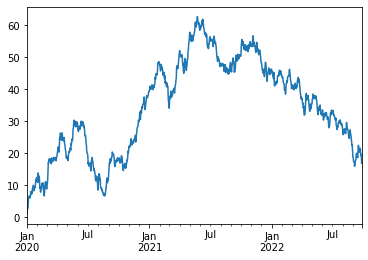

In [76]:
ts = pd.Series(
    np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000)
)
ts.cumsum().plot()

<AxesSubplot:>

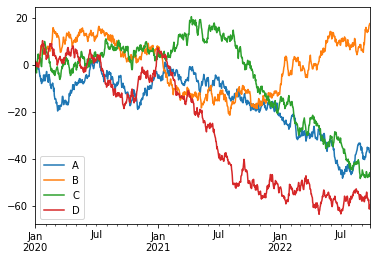

In [77]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df.cumsum().plot()

<AxesSubplot:ylabel='Density'>

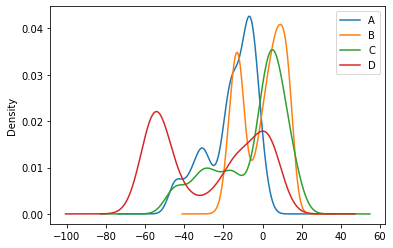

In [78]:
df.cumsum().plot(kind="kde")

# 13. Importing / Exporting Data

### CSV

In [79]:
# Writing to a csv file
df.to_csv("../data/data.csv")

In [80]:
# Reading from a csv file
pd.read_csv("../data/data.csv", index_col=0).head()

,A,B,C,D
2020-01-01,-0.913490,-0.116624,-0.621891,1.400424
2020-01-02,-1.501758,1.426448,-0.752471,-0.559482
2020-01-03,2.973277,-0.043029,-0.489548,-1.451232
2020-01-04,0.389359,-1.322722,-1.294031,-0.301786
2020-01-05,-1.071814,-0.490886,-0.338077,0.976631


### Excel

In [81]:
# Writing to an excel file
df.to_excel("../data/data.xlsx", sheet_name="Sheet1")

In [82]:
# Reading from an excel file
pd.read_excel("../data/data.xlsx", sheet_name="Sheet1", index_col=0).head()

,A,B,C,D
2020-01-01,-0.913490,-0.116624,-0.621891,1.400424
2020-01-02,-1.501758,1.426448,-0.752471,-0.559482
2020-01-03,2.973277,-0.043029,-0.489548,-1.451232
2020-01-04,0.389359,-1.322722,-1.294031,-0.301786
2020-01-05,-1.071814,-0.490886,-0.338077,0.976631


### HDF5

In [83]:
# Writing to a HDF5 Store
df.to_hdf("../data/data.h5", "df")

In [84]:
# Reading from a HDF5 Store 
pd.read_hdf("../data/data.h5", "df").head()

,A,B,C,D
2020-01-01,-0.913490,-0.116624,-0.621891,1.400424
2020-01-02,-1.501758,1.426448,-0.752471,-0.559482
2020-01-03,2.973277,-0.043029,-0.489548,-1.451232
2020-01-04,0.389359,-1.322722,-1.294031,-0.301786
2020-01-05,-1.071814,-0.490886,-0.338077,0.976631
